In [2]:
import os
import json
import pandas as pd
import requests
from pprint import pprint
from dotenv import load_dotenv
from IPython.display import Image

In [3]:
load_dotenv() # Gets env variables (API access token)
THEMOVIEDB_ACCESS_TOKEN = os.getenv("THEMOVIEDB_ACCESS_TOKEN")

In [4]:
headers = {
    "accept": "application/json",
    "Authorization": f"Bearer {THEMOVIEDB_ACCESS_TOKEN}"
}

In [5]:
# Gets movies with matching title and year
title = "sound of freedom".replace(" ", "%20")
year = "2023"

url = f"https://api.themoviedb.org/3/search/movie?query={title}&include_adult=false&language=en-US&page=1&year={year}"
matching_movies = json.loads(requests.get(url, headers=headers).text)
pprint(matching_movies)

{'page': 1,
 'results': [{'adult': False,
              'backdrop_path': '/pA3vdhadJPxF5GA1uo8OPTiNQDT.jpg',
              'genre_ids': [28, 18],
              'id': 678512,
              'original_language': 'en',
              'original_title': 'Sound of Freedom',
              'overview': 'The story of Tim Ballard, a former US government '
                          'agent, who quits his job in order to devote his '
                          'life to rescuing children from global sex '
                          'traffickers.',
              'popularity': 802.647,
              'poster_path': '/qA5kPYZA7FkVvqcEfJRoOy4kpHg.jpg',
              'release_date': '2023-07-03',
              'title': 'Sound of Freedom',
              'video': False,
              'vote_average': 8.069,
              'vote_count': 934}],
 'total_pages': 1,
 'total_results': 1}


In [6]:
# Gets ID of best result
best_result = matching_movies["results"][0]
movie_id = best_result["id"]
movie_id

678512

In [7]:
# Gets movie details by its ID
url = f"https://api.themoviedb.org/3/movie/{movie_id}?language=en-US"
movie_details = json.loads(requests.get(url, headers=headers).text)
pprint(movie_details)

{'adult': False,
 'backdrop_path': '/pA3vdhadJPxF5GA1uo8OPTiNQDT.jpg',
 'belongs_to_collection': None,
 'budget': 15000000,
 'genres': [{'id': 28, 'name': 'Action'}, {'id': 18, 'name': 'Drama'}],
 'homepage': 'https://www.soundoffreedommovie.com/',
 'id': 678512,
 'imdb_id': 'tt7599146',
 'original_language': 'en',
 'original_title': 'Sound of Freedom',
 'overview': 'The story of Tim Ballard, a former US government agent, who '
             'quits his job in order to devote his life to rescuing children '
             'from global sex traffickers.',
 'popularity': 802.647,
 'poster_path': '/qA5kPYZA7FkVvqcEfJRoOy4kpHg.jpg',
 'production_companies': [{'id': 90508,
                           'logo_path': None,
                           'name': 'Santa Fe Films',
                           'origin_country': 'US'}],
 'production_countries': [{'iso_3166_1': 'US',
                           'name': 'United States of America'}],
 'release_date': '2023-07-03',
 'revenue': 238000000,
 'runtime'

In [8]:
# Gets alternative titles
url = "https://api.themoviedb.org/3/movie/678512/alternative_titles?country=BR"
alternative_title = json.loads(requests.get(url, headers=headers).text)['titles'][0]['title']
alternative_title

'Som da Liberdade'

In [9]:
# Gets a list of posters
url = f"https://api.themoviedb.org/3/movie/{movie_id}/images?language=en"

# Gets paths to all images
images = json.loads(requests.get(url, headers=headers).text)

# Only poster
posters = images['posters']

# Assuming the first poster is the 'best' image
poster_path = posters[0]['file_path']

In [10]:
# Gets the poster
url = f"https://image.tmdb.org/t/p/original/{poster_path}"
poster = requests.get(url, headers=headers).content

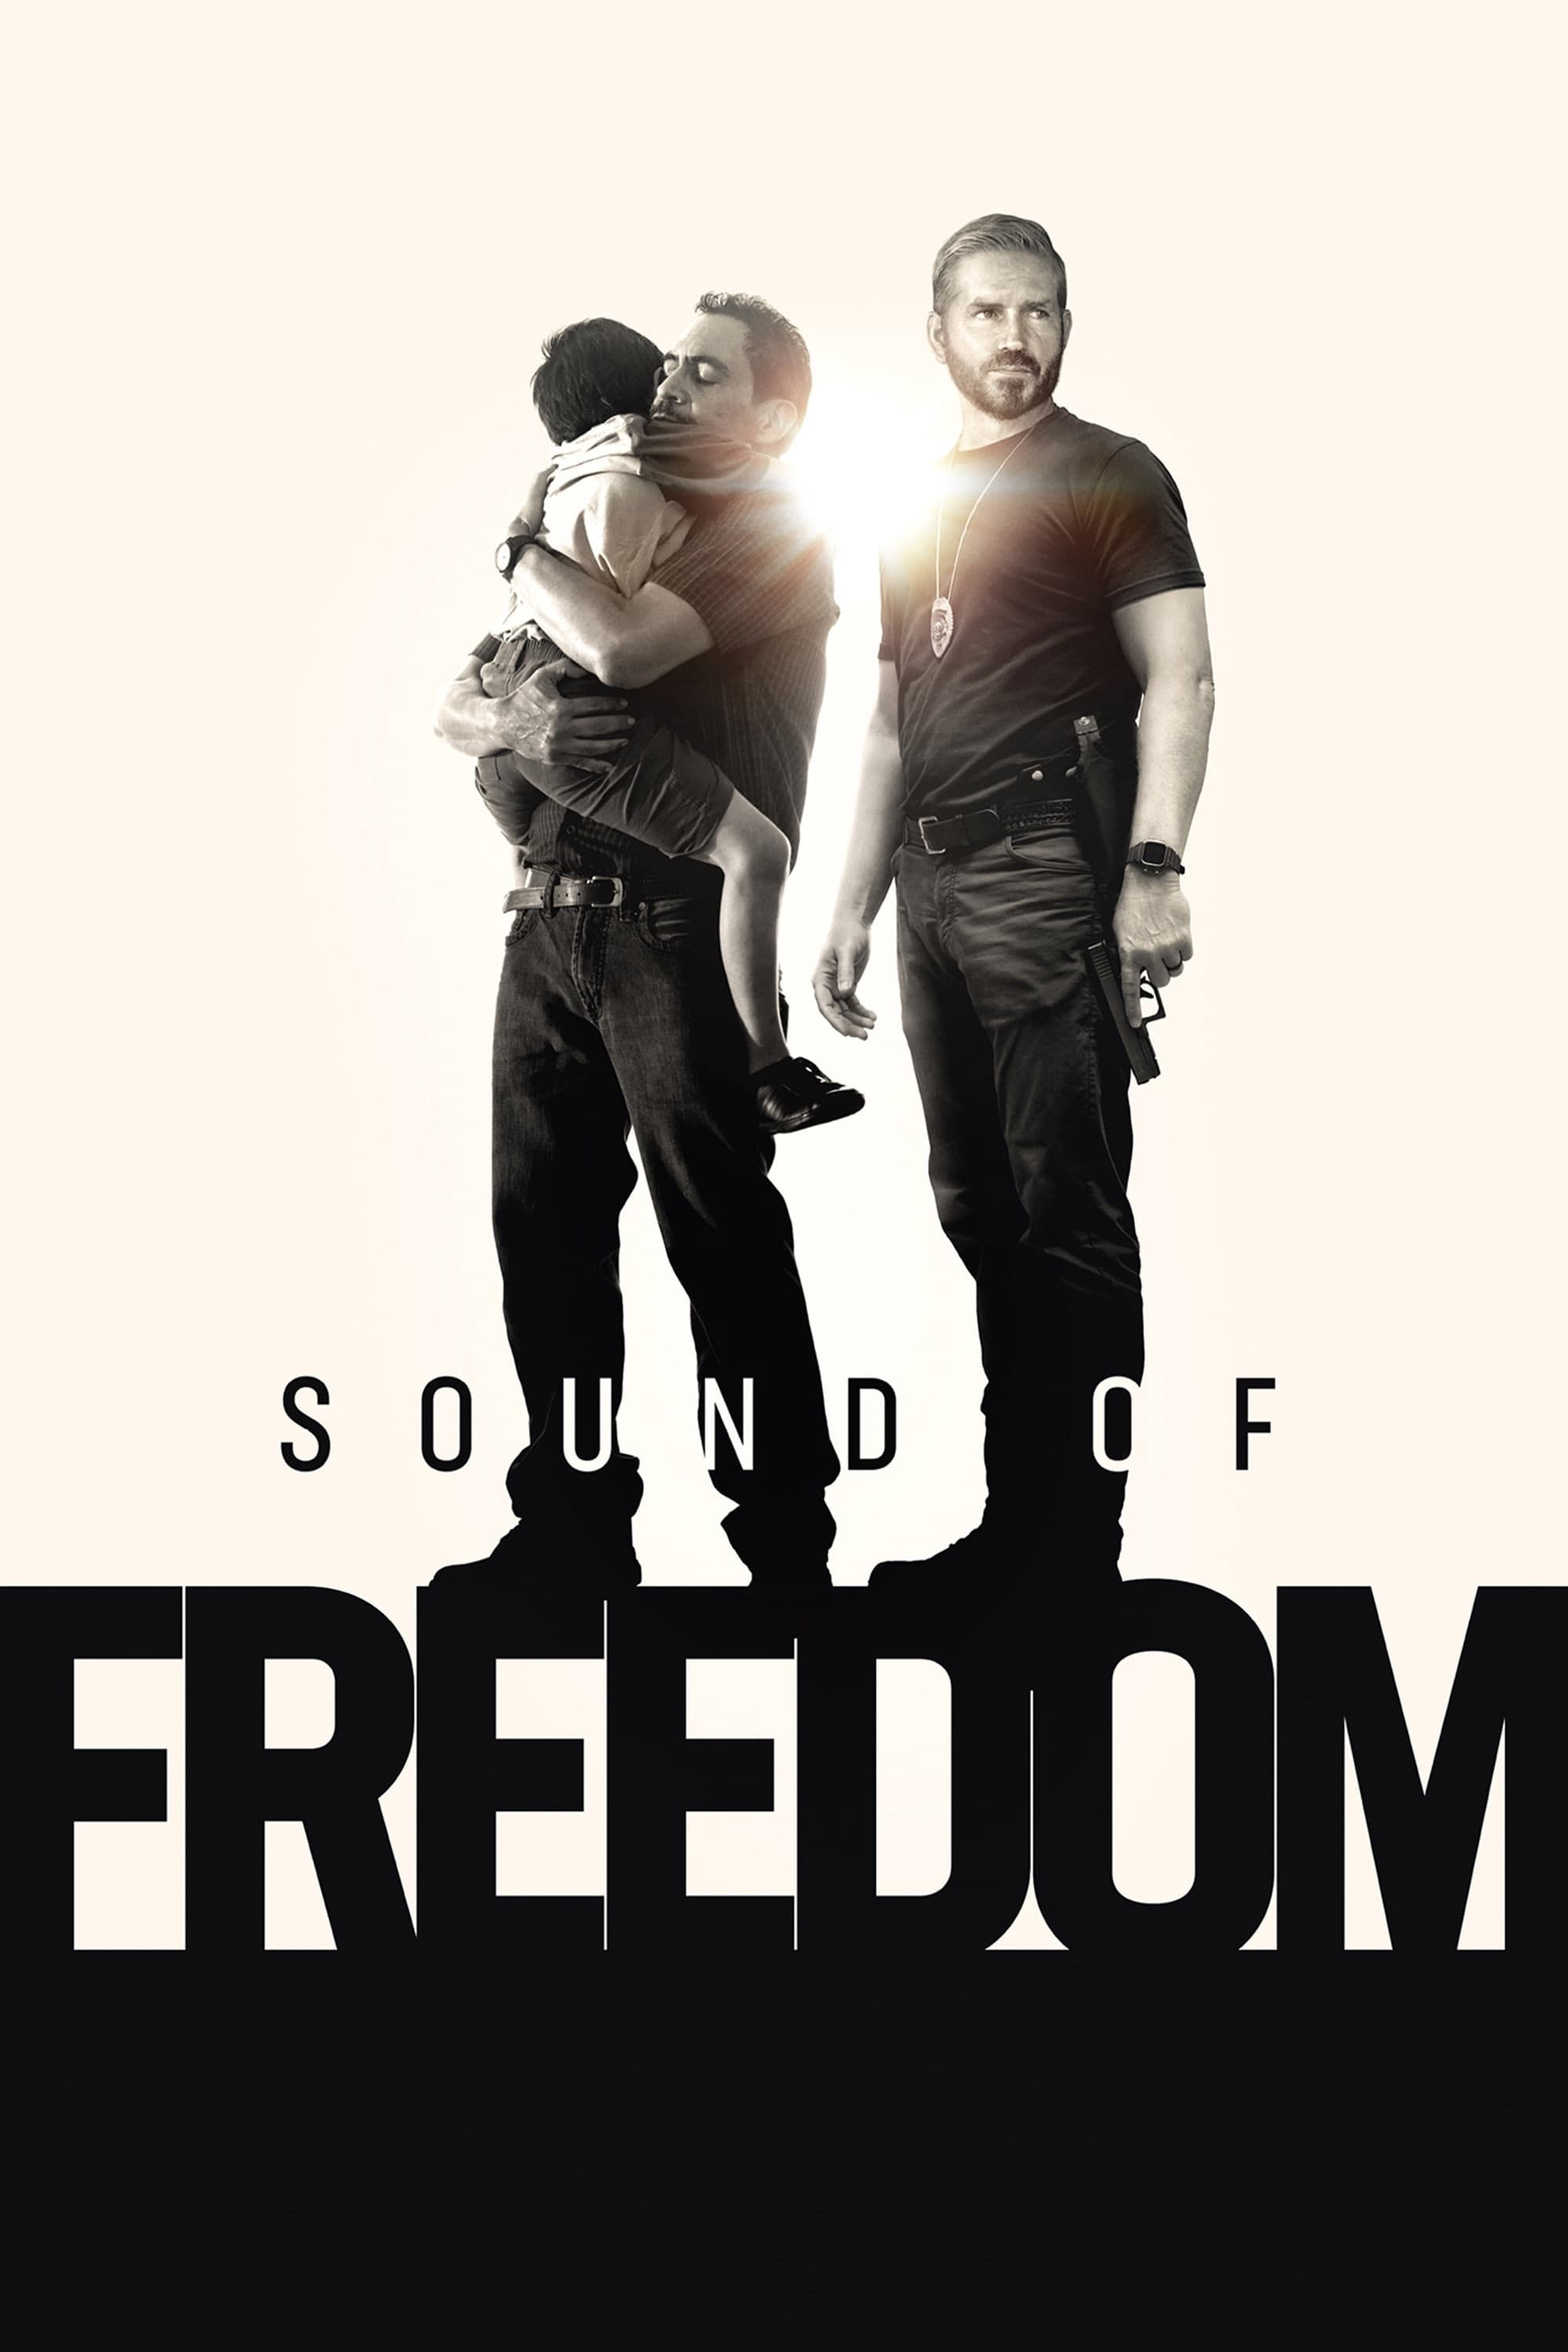

In [11]:
# Shows the poster
with open(f"../images/{movie_id}.jpg", "wb") as file:
    file.write(poster)
Image(filename=f"../images/{movie_id}.jpg", width=200)

In [12]:
# Definition of Movie class
class Movie:
    def __init__(self, id, title, alternative_title, budget, revenue, genres, homepage, imdb_id, original_language, 
                 original_title, overview, production_companies, production_countries, release_date, runtime):
        self.id = id
        self.title = title
        self.alternative_title = alternative_title
        self.budget = budget
        self.revenue = revenue
        self.genres = ', '.join([genre['name'] for genre in genres])
        self.homepage = homepage
        self.imdb_id = imdb_id
        self.imdb_link = self.get_imdb_link(imdb_id)
        self.original_language = original_language
        self.original_title = original_title
        self.overview = overview
        self.production_companies = ', '.join([company['name'] for company in production_companies])
        self.production_countries = ', '.join([country['name'] for country in production_countries])
        self.runtime = runtime

        # Convert date from format 2023-03-31 to 31/03/2023
        release_date = release_date.split("-")
        day, month, year = release_date[2], release_date[1], release_date[0]
        self.release_date = f"{day}/{month}/{year}"

        print(f"*** Movie instantiated")
        print(f"--> Title: {self.title}")
        print(f"--> Alternative title: {self.alternative_title}")
        print(f"--> Original language: {self.original_language}")
        print(f"--> Homepage: {self.homepage}")
        print(f"--> IMDB link: {self.imdb_link}")

    @staticmethod    
    def get_imdb_link(imdb_id):
        imdb_link = f"https://www.imdb.com/title/{imdb_id}/"
        return imdb_link

# Creates Movie object
sound_of_freedom = Movie(
    id=movie_details["id"],
    title=movie_details["title"],
    alternative_title=alternative_title,
    budget=movie_details["budget"],
    revenue=movie_details["revenue"],
    genres=movie_details["genres"],
    homepage=movie_details["homepage"],
    imdb_id=movie_details["imdb_id"],
    original_language=movie_details["original_language"],
    original_title=movie_details["original_title"],
    overview=movie_details["overview"],
    production_companies=movie_details["production_companies"],
    production_countries=movie_details["production_countries"],
    release_date=movie_details["release_date"],
    runtime=movie_details["runtime"])

*** Movie instantiated
--> Title: Sound of Freedom
--> Alternative title: Som da Liberdade
--> Original language: en
--> Homepage: https://www.soundoffreedommovie.com/
--> IMDB link: https://www.imdb.com/title/tt7599146/


In [13]:
# Export movie info to CSV
movie_info = pd.DataFrame()
sound_of_freedom_info_dict = {
    'Título original': sound_of_freedom.title,
    'Título alternativo': sound_of_freedom.alternative_title,
    'Orçamento': sound_of_freedom.budget,
    'Bilheteria': sound_of_freedom.revenue,
    'Gêneros': sound_of_freedom.genres,
    'URL': sound_of_freedom.homepage,
    'IMDB (ID)': sound_of_freedom.imdb_id,
    'IMDB': sound_of_freedom.imdb_link,
    'Idioma original': sound_of_freedom.original_language,
    'Sinopse': sound_of_freedom.overview,
    'Produção': sound_of_freedom.production_companies,
    'País': sound_of_freedom.production_countries,
    'Data de lançamento': sound_of_freedom.release_date,
    'Duração': sound_of_freedom.runtime
}
movie_info = pd.concat([movie_info, pd.DataFrame([sound_of_freedom_info_dict])])
# movie_info

In [14]:
movie_info.to_csv("../csv/movie_info.csv", index=False)